In [1]:
import datetime
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader.data as web
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')



In [3]:
start = datetime.datetime(2015, 1, 1)
end = datetime.datetime.now()

df = web.DataReader("XOM", "quandl", start, end)  #iex - another source if quandl is down
df.tail()

,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume
Date,,,,,,,,,,,,
2015-01-08,91.25,92.27,91.00,92.23,15466246.0,0.0,1.0,82.051428,82.968606,81.826630,82.932638,15466246.0
2015-01-07,90.65,91.48,90.00,90.72,13589990.0,0.0,1.0,81.511912,82.258243,80.927436,81.574855,13589990.0
2015-01-06,90.24,91.41,89.02,89.81,16663441.0,0.0,1.0,81.143242,82.195299,80.046226,80.756589,16663441.0
2015-01-05,92.10,92.40,89.50,90.29,18502381.0,0.0,1.0,82.815743,83.085501,80.477839,81.188202,18502381.0
2015-01-02,92.25,93.05,91.81,92.83,10219070.0,0.0,1.0,82.950622,83.669977,82.554977,83.472154,10219070.0


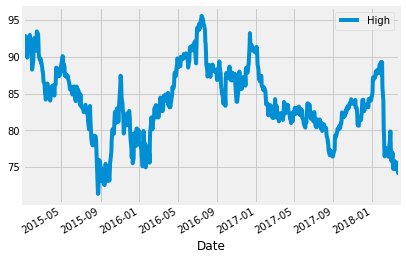

In [4]:
df['High'].plot()
plt.legend()
plt.show()

In [5]:
df[['High','Low']].head()

,High,Low
Date,,
2018-03-27,74.8949,73.2750
2018-03-26,74.1500,72.7548
2018-03-23,74.2100,72.6700
2018-03-22,74.7000,73.3900
2018-03-21,75.6400,73.9800


In [7]:
df['100ma'] = df['AdjClose'].rolling(window=100).mean()

In [8]:
df.head()

,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume,100ma
Date,,,,,,,,,,,,,
2018-03-27,74.00,74.8949,73.2750,73.70,14625541.0,0.0,1.0,74.00,74.8949,73.2750,73.70,14625541.0,NaN
2018-03-26,73.65,74.1500,72.7548,74.00,14894438.0,0.0,1.0,73.65,74.1500,72.7548,74.00,14894438.0,NaN
2018-03-23,73.81,74.2100,72.6700,72.89,19069634.0,0.0,1.0,73.81,74.2100,72.6700,72.89,19069634.0,NaN
2018-03-22,74.42,74.7000,73.3900,73.50,17118037.0,0.0,1.0,74.42,74.7000,73.3900,73.50,17118037.0,NaN
2018-03-21,74.23,75.6400,73.9800,75.04,14813757.0,0.0,1.0,74.23,75.6400,73.9800,75.04,14813757.0,NaN


In [10]:
df['100ma'] = df['AdjClose'].rolling(window=100,min_periods=0).mean()
df.head()

,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume,100ma
Date,,,,,,,,,,,,,
2018-03-27,74.00,74.8949,73.2750,73.70,14625541.0,0.0,1.0,74.00,74.8949,73.2750,73.70,14625541.0,73.7000
2018-03-26,73.65,74.1500,72.7548,74.00,14894438.0,0.0,1.0,73.65,74.1500,72.7548,74.00,14894438.0,73.8500
2018-03-23,73.81,74.2100,72.6700,72.89,19069634.0,0.0,1.0,73.81,74.2100,72.6700,72.89,19069634.0,73.5300
2018-03-22,74.42,74.7000,73.3900,73.50,17118037.0,0.0,1.0,74.42,74.7000,73.3900,73.50,17118037.0,73.5225
2018-03-21,74.23,75.6400,73.9800,75.04,14813757.0,0.0,1.0,74.23,75.6400,73.9800,75.04,14813757.0,73.8260


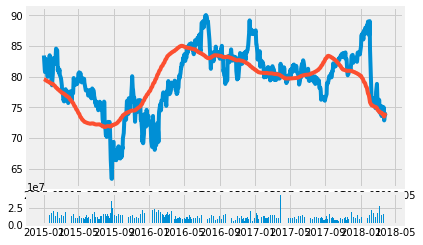

In [13]:
ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1,sharex=ax1)

ax1.plot(df.index, df['AdjClose'])
ax1.plot(df.index, df['100ma'])
ax2.bar(df.index, df['Volume'])

plt.show()